In [3]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 11.6 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")


In [6]:
file_path = 'exchange_rate_to_usd.csv'

data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.fillna(data.mean(), inplace=True)

print(data.head())
print(data.isnull().sum())


            chinese_yuan_to_usd  euro_to_usd  japanese_yen_to_usd  \
date                                                                
2004-01-02             0.145682       1.2592             0.009426   
2004-01-05             0.120817       1.2657             0.009355   
2004-01-06             0.120815       1.2756             0.009412   
2004-01-07             0.120814       1.2679             0.009413   
2004-01-08             0.120814       1.2634             0.009421   

            uk_pound_to_usd  us_dollar_to_usd  algerian_dinar_to_usd  \
date                                                                   
2004-01-02           1.7858               1.0               0.009783   
2004-01-05           1.7996               1.0               0.009783   
2004-01-06           1.8209               1.0               0.009783   
2004-01-07           1.8140               1.0               0.009783   
2004-01-08           1.8122               1.0               0.009783   

           

In [7]:

returns = data['euro_to_usd'].pct_change().dropna()

model = arch_model(returns, vol='Garch', p=1, q=1)
garch_result = model.fit(disp='off')

print(garch_result.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            euro_to_usd   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                15433.0
Distribution:                  Normal   AIC:                          -30858.1
Method:            Maximum Likelihood   BIC:                          -30831.8
                                        No. Observations:                 5173
Date:                Wed, Aug 07 2024   Df Residuals:                     5172
Time:                        13:21:34   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.2785e-04  1.519e-04      0.842      0.400 

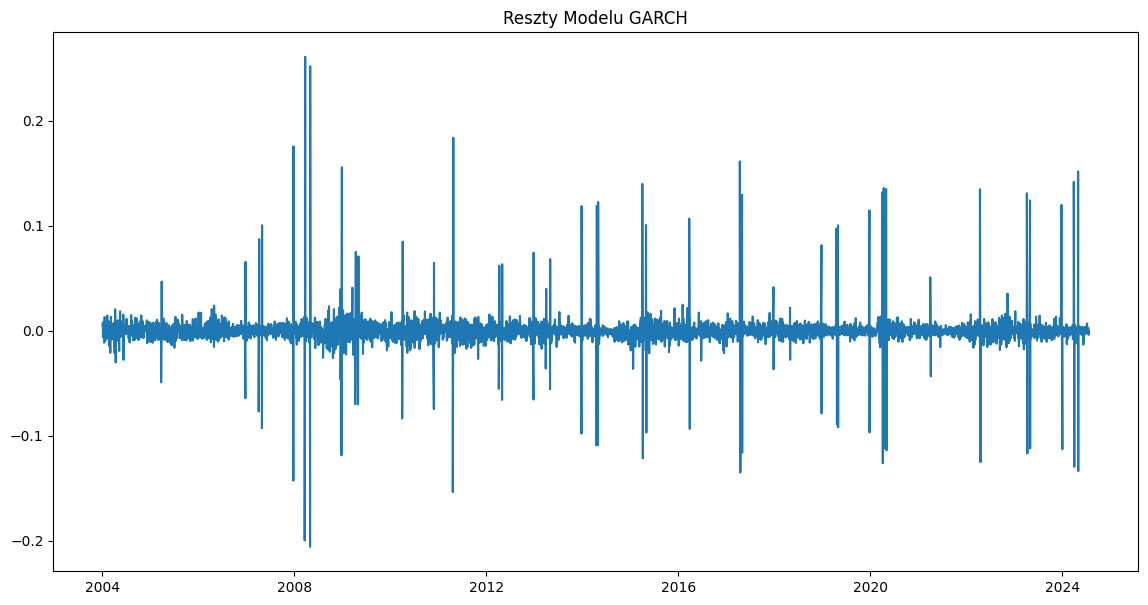

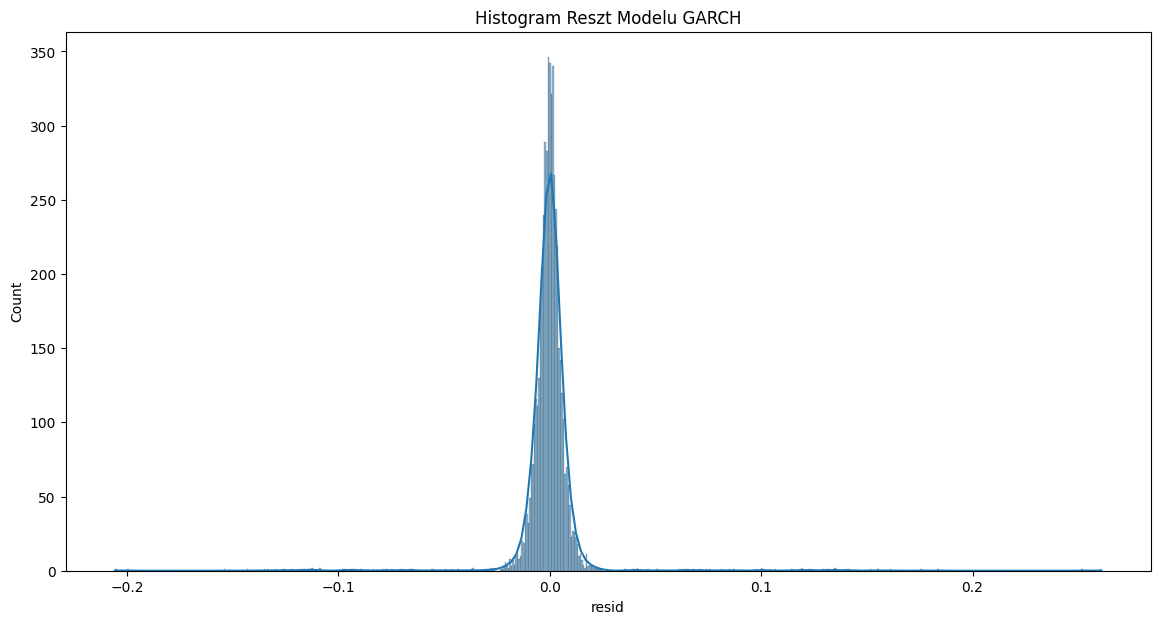

<Figure size 1400x700 with 0 Axes>

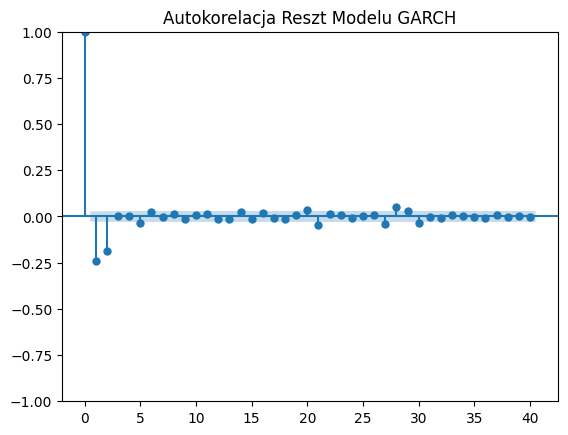

In [10]:
# Residual plot of the GARCH model
plt.figure(figsize=(14, 7))
plt.plot(garch_result.resid)
plt.title('Reszty Modelu GARCH')
plt.show()

# Histogram of residuals from the GARCH model
plt.figure(figsize=(14, 7))
sns.histplot(garch_result.resid, kde=True)
plt.title('Histogram Reszt Modelu GARCH')
plt.show()

# Autocorrelation of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 7))
plot_acf(garch_result.resid, lags=40)
plt.title('Autokorelacja Reszt Modelu GARCH')
plt.show()


In [11]:
# Selecting only the column euro_to_usd
returns = data['euro_to_usd'].pct_change().dropna()

# Fitting a GARCH(1,2) model
model_garch_1_2 = arch_model(returns, vol='Garch', p=1, q=2)
garch_result_1_2 = model_garch_1_2.fit(disp='off')
print("GARCH(1,2) Results")
print(garch_result_1_2.summary())

# Fitting a GARCH(2,1) model
model_garch_2_1 = arch_model(returns, vol='Garch', p=2, q=1)
garch_result_2_1 = model_garch_2_1.fit(disp='off')
print("GARCH(2,1) Results")
print(garch_result_2_1.summary())


GARCH(1,2) Results
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            euro_to_usd   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                15439.5
Distribution:                  Normal   AIC:                          -30869.1
Method:            Maximum Likelihood   BIC:                          -30836.3
                                        No. Observations:                 5173
Date:                Wed, Aug 07 2024   Df Residuals:                     5172
Time:                        13:22:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.3008e-04  2.195e-04    

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam


In [13]:
# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['euro_to_usd'].values.reshape(-1, 1))

# Preparing data sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 60
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Splitting into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [14]:
# Building an LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 0.0382 - val_loss: 9.6083e-04
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0014 - val_loss: 9.8206e-04
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0015 - val_loss: 9.6260e-04
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0016 - val_loss: 9.5240e-04
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0014 - val_loss: 9.5629e-04
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0012 - val_loss: 9.9951e-04
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0012 - val_loss: 9.6051e-04
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0014 - val_loss: 9.9468e-04
Epoch

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


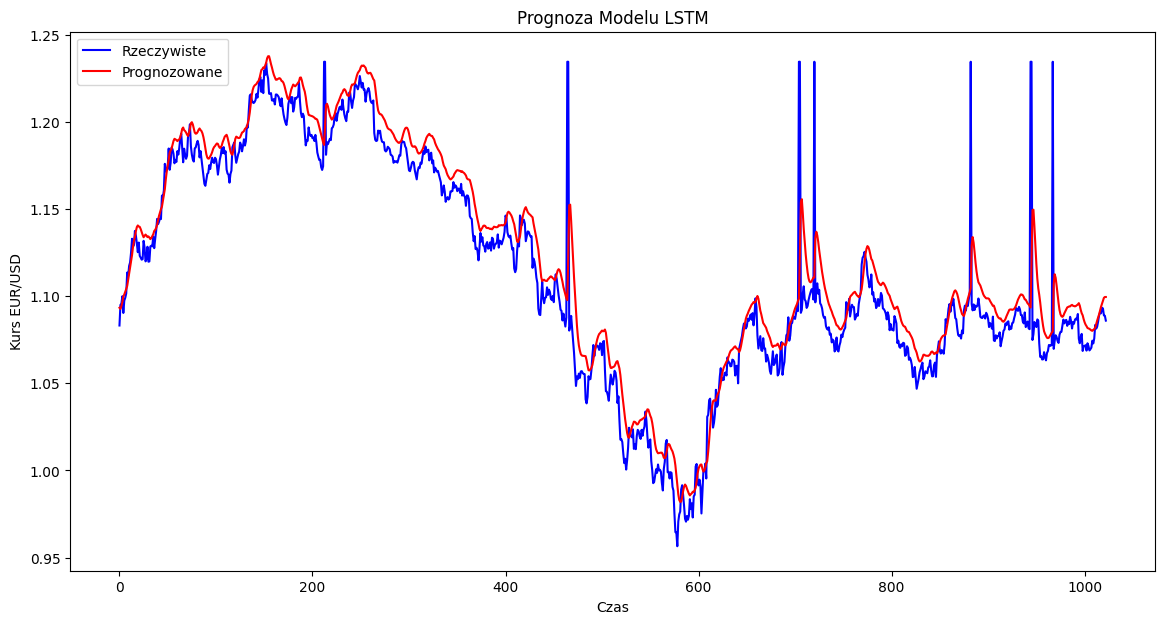

In [15]:
# Forecasting on the test set
y_pred = model.predict(X_test)

# Inverse data normalization
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# Visualization of results
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Rzeczywiste')
plt.plot(y_pred, color='red', label='Prognozowane')
plt.xlabel('Czas')
plt.ylabel('Kurs EUR/USD')
plt.title('Prognoza Modelu LSTM')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


MSE: 0.00038139632764752233
MAE: 0.013200332024909453
